In [41]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

min_max_scaler = MinMaxScaler()

In [42]:
df = pd.read_csv("C:/Users/Tarang Jain/Desktop/market-price.csv")


In [43]:
df.head()

,Date,Price
0,03-01-2009 00:00,0.0
1,05-01-2009 00:00,0.0
2,07-01-2009 00:00,0.0
3,09-01-2009 00:00,0.0
4,11-01-2009 00:00,0.0


In [44]:
df_norm = df.drop(['Date'], 1, inplace=True)

In [45]:
prediction_days = 30

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

In [46]:
training_set = df_train.values
training_set = min_max_scaler.fit_transform(training_set)

x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [47]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 100

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/100
1711/1711 [==============================] - 1s - loss: 0.0189     
Epoch 2/100
1711/1711 [==============================] - 0s - loss: 0.0177     
Epoch 3/100
1711/1711 [==============================] - 0s - loss: 0.0168     
Epoch 4/100
1711/1711 [==============================] - 0s - loss: 0.0158     
Epoch 5/100
1711/1711 [==============================] - 0s - loss: 0.0146     
Epoch 6/100
1711/1711 [==============================] - 0s - loss: 0.0132     
Epoch 7/100
1711/1711 [==============================] - 0s - loss: 0.0114     
Epoch 8/100
1711/1711 [==============================] - 0s - loss: 0.0095     
Epoch 9/100
1711/1711 [==============================] - 0s - loss: 0.0074     
Epoch 10/100
1711/1711 [==============================] - 0s - loss: 0.0053     
Epoch 11/100
1711/1711 [==============================] - 0s - loss: 0.0035     
Epoch 12/100
1711/1711 [==============================] - 0s - loss: 0.0021     
Epoch 13/100
1711/1711 [=============

1711/1711 [==============================] - 0s - loss: 1.6197e-04     
Epoch 99/100
1711/1711 [==============================] - 0s - loss: 1.6793e-04     
Epoch 100/100
1711/1711 [==============================] - 0s - loss: 1.6627e-04     


In [48]:
test_set = df_test.values

inputs = np.reshape(test_set, (len(test_set), 1))
inputs = min_max_scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

In [49]:
testScore = math.sqrt(mean_squared_error(test_set[:, 0], predicted_price[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 38.86 RMSE


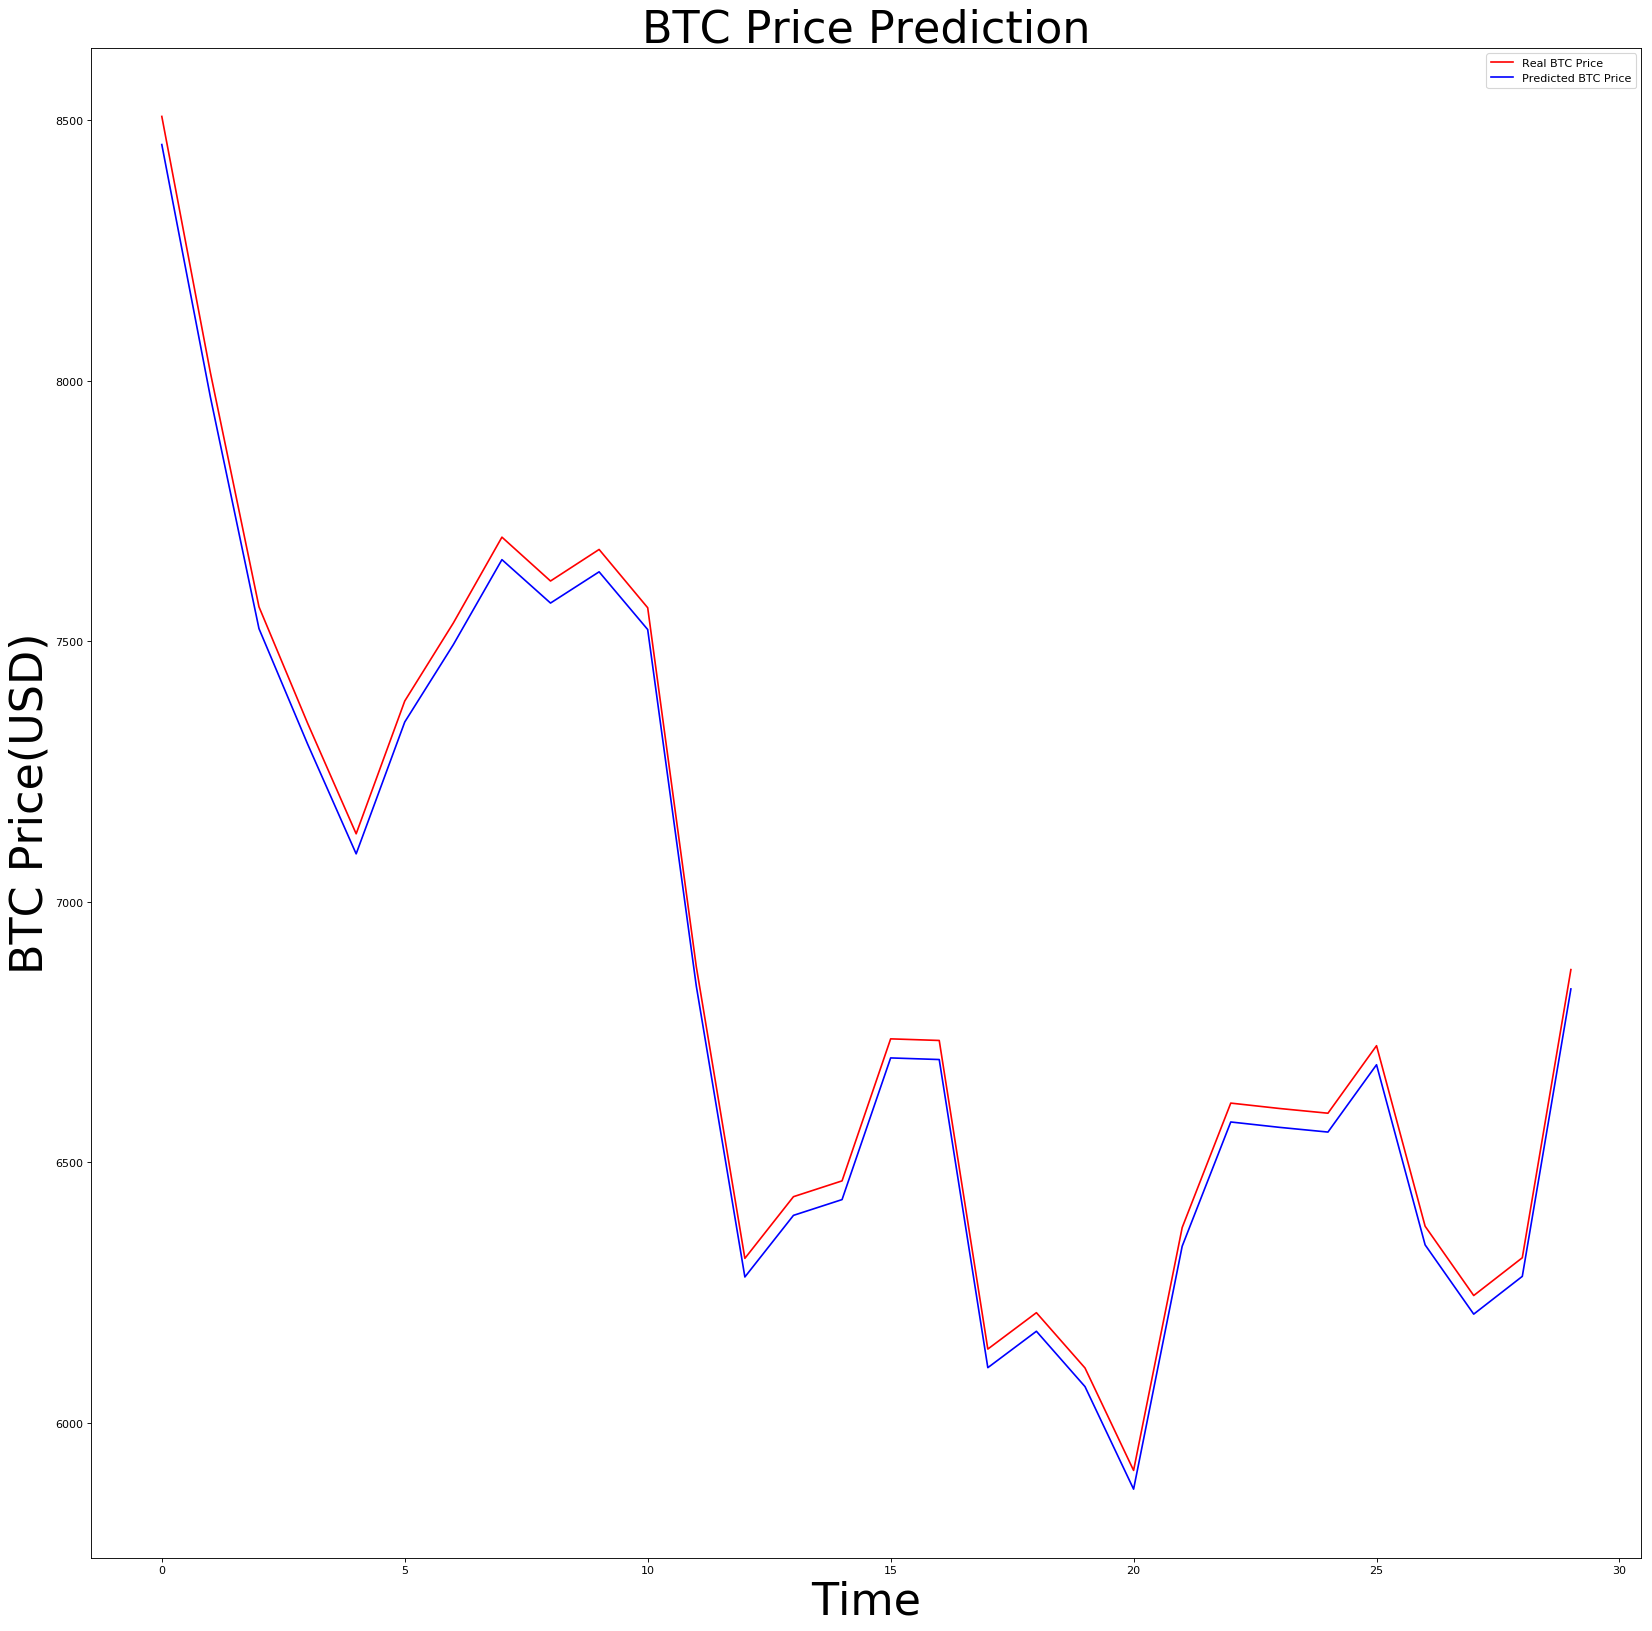

In [50]:
plt.figure(figsize=(25, 25), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend(loc = 'best')
plt.show()